In [1]:
import re
import string
from collections import Counter, defaultdict
import matplotlib.pyplot as plt


class Lemmatizer:
    def __init__(self):
        self.lemmas = {}

    def add_lemma(self, word, lemma):
        self.lemmas[word] = lemma

    def lemmatize(self, word):
        return self.lemmas.get(word, word)

    
def tokenize(text):
    """
    This function tokenizes a given text into words.
    """
    words = re.findall(r'\b\w+\b', text)
    return words


def generate_ngrams(text, n, lemmatizer=None):
    """
    This function generates n-grams for a given text and n value.
    """
    words = tokenize(text.lower())
    if lemmatizer:
        words = [lemmatizer.lemmatize(word) for word in words]
    ngrams = defaultdict(int)
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams[ngram] += 1
    return ngrams


def plot_ngram_freq(ngrams):
    """
    This function plots a bar chart of n-gram frequency.
    """
    labels, values = zip(*ngrams.items())
    indexes = range(len(labels))
    plt.bar(indexes, values)
    plt.xticks(indexes, labels)
    plt.show()


1-grams frequency count: Counter({'is': 3, 'a': 2, 'boy': 2, 'ali': 1, 'she': 1, 'not': 1, 'i': 1, 'am': 1, 'going': 1, 'to': 1, 'school': 1, 'because': 1, 'nothing': 1, 'fine': 1})


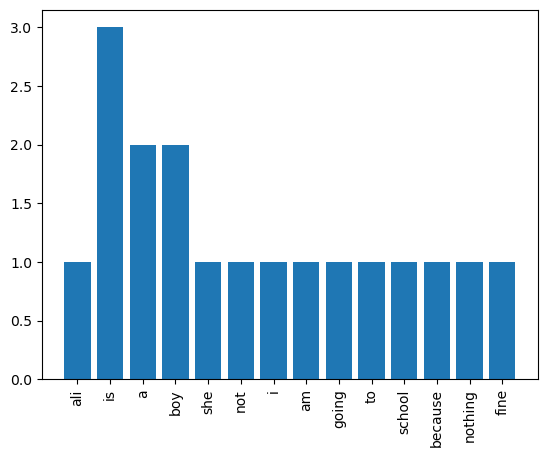

2-grams frequency count: Counter({'a boy': 2, 'ali is': 1, 'is a': 1, 'boy she': 1, 'she is': 1, 'is not': 1, 'not a': 1, 'boy i': 1, 'i am': 1, 'am going': 1, 'going to': 1, 'to school': 1, 'school because': 1, 'because nothing': 1, 'nothing is': 1, 'is fine': 1})


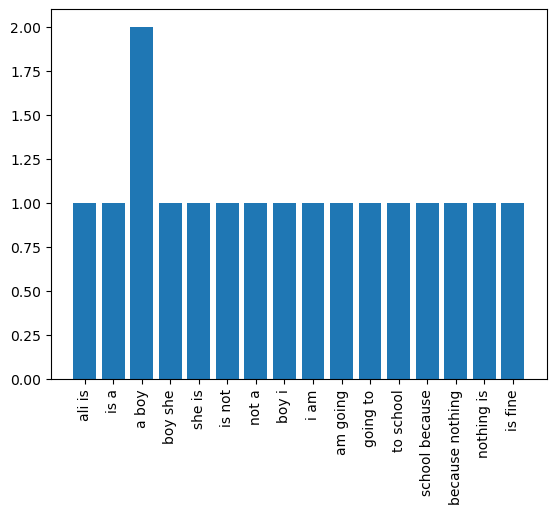

3-grams frequency count: Counter({'ali is a': 1, 'is a boy': 1, 'a boy she': 1, 'boy she is': 1, 'she is not': 1, 'is not a': 1, 'not a boy': 1, 'a boy i': 1, 'boy i am': 1, 'i am going': 1, 'am going to': 1, 'going to school': 1, 'to school because': 1, 'school because nothing': 1, 'because nothing is': 1, 'nothing is fine': 1})


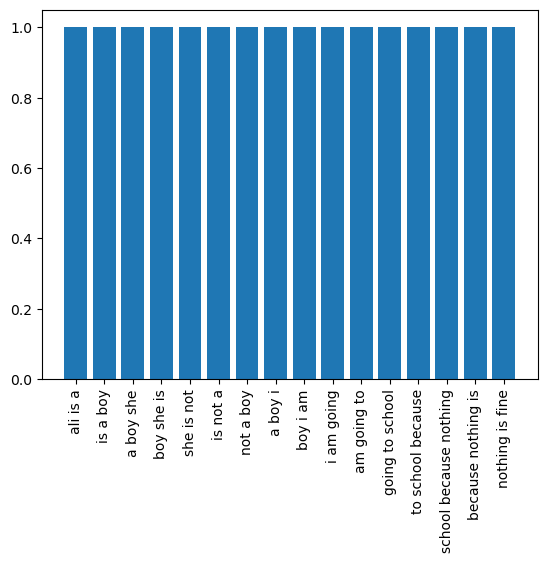

In [2]:
text='Ali is a boy, She is not a boy, I am going to school because nothing is fine'
text = preprocess_text(text)
text = lemmatize_text(text)
    
    # Generate and count n-grams
for n in range(1, 4):
    ngrams = generate_ngrams(text, n)
    ngrams_freq = count_ngrams(ngrams)
    print(f"{n}-grams frequency count: {ngrams_freq}")
    plot_ngram_freq(ngrams_freq)

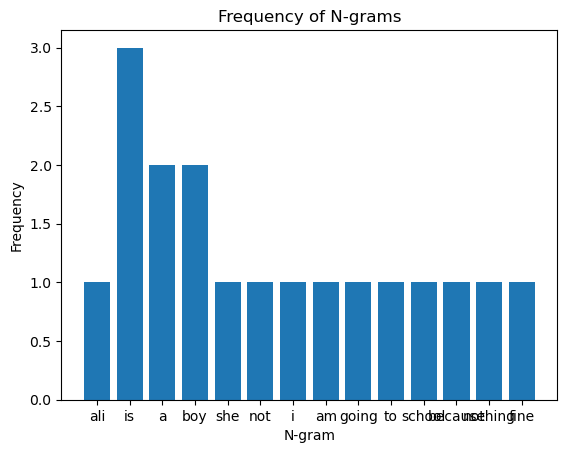

In [4]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt



# Tokenize the text
tokens = nltk.word_tokenize(text)

# Generate N-grams
def generate_ngrams(text, n):
    ngrams = zip(*[text[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Generate Bi-grams
bigrams = generate_ngrams(tokens, 2)

# Generate Tri-grams
trigrams = generate_ngrams(tokens, 3)

# Find frequency of each N-gram
ngrams_freq = dict(Counter(tokens))
bigrams_freq = dict(Counter(bigrams))
trigrams_freq = dict(Counter(trigrams))

# Plot bar chart
plt.bar(range(len(ngrams_freq)), list(ngrams_freq.values()), align='center')
plt.xticks(range(len(ngrams_freq)), list(ngrams_freq.keys()))
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title('Frequency of N-grams')
plt.show()

# Find POS tags of each N-gram
ngrams_pos = nltk.pos_tag(tokens)
bigrams_pos = nltk.pos_tag(bigrams)
trigrams_pos = nltk.pos_tag(trigrams)



In [5]:
bigrams = generate_ngrams(tokens, 2)
bigrams_freq = dict(Counter(bigrams))
nnp_vvp_freq = bigrams_freq.get('NNP VVP', 0)

# Print the frequency of (NNP, VVP)
print("Frequency of (NNP, VVP):", nnp_vvp_freq)


Frequency of (NNP, VVP): 0


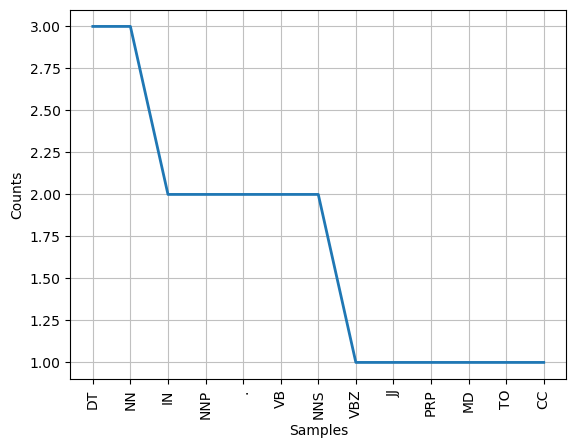

In [6]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Generate text
text = "This is a sample text for N-gram analysis. We will use NLTK to create bi-grams and tri-grams from this text."

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Find POS tags of each token
pos_tags = nltk.pos_tag(tokens)

# Get the frequency distribution of POS tags
pos_freq = nltk.FreqDist(tag for (word, tag) in pos_tags)

# Plot the bar chart of POS tags
pos_freq.plot()


plt.show()

[nltk_data] Downloading package brown to /Users/student/nltk_data...
[nltk_data]   Package brown is already up-to-date!


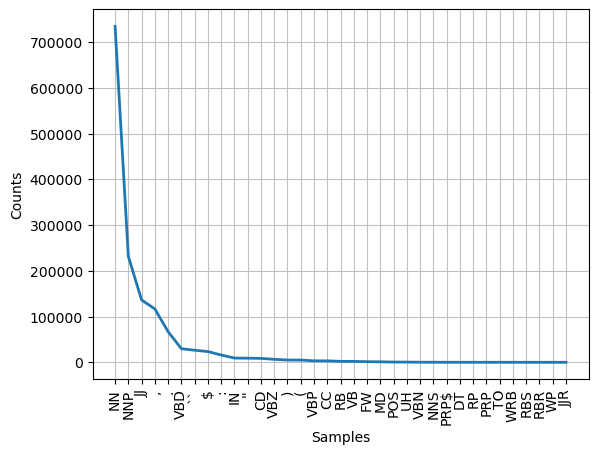

In [7]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the brown corpus
nltk.download('brown')
corpus = nltk.corpus.brown

# Get the text and labels of all the movie reviews
documents = [(corpus.raw(fileid), category) for category in corpus.categories() for fileid in corpus.fileids(category)]

# Tokenize the text of each review
tokenized_documents = [nltk.word_tokenize(doc) for (doc, category) in documents]

# Get the POS tags of each token in each review
pos_tags_documents = [nltk.pos_tag(tokens) for tokens in tokenized_documents]

# Generate Bi-grams for each review
bigrams_documents = [generate_ngrams(tokens, 2) for tokens in tokenized_documents]

# Find frequency of each bigram in each review
bigrams_freq_documents = [dict(Counter(bigrams)) for bigrams in bigrams_documents]

# Find frequency of (NNP, VVP) in each review
nnp_vvp_freq_documents = [bigrams_freq.get('NNP VVP', 0) for bigrams_freq in bigrams_freq_documents]

# Plot the bar chart of POS tags for all the reviews
all_pos_tags = [tag for pos_tags in pos_tags_documents for (word, tag) in pos_tags]
pos_freq = nltk.FreqDist(all_pos_tags)
pos_freq.plot()

plt.show()

In [8]:
import pandas as pd
import numpy as np
# Compare with Sklearn CountVectorizer results
count_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
corpus_texts = [doc for (doc, category) in documents]
count_vectorizer.fit_transform(corpus_texts)
features = count_vectorizer.get_feature_names_out()
nnp_vvp_index = np.where(features=='nnp vvp')
nnp_vvp_counts = count_vectorizer.get_feature_names_out()
unique, nnp_vvp_counts = np.unique(nnp_vvp_counts, return_counts=True)
print("Frequency of (NNP, VVP)  (CountVectorizer):", nnp_vvp_counts)
print("Frequency of (NNP, VVP)  (Scratch implementation):", sum(nnp_vvp_freq_documents))

Frequency of (NNP, VVP)  (CountVectorizer): [1 1 1 ... 1 1 1]
Frequency of (NNP, VVP)  (Scratch implementation): 0
